In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np

# For splitting dataset
from sklearn.model_selection import train_test_split

# For preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# For feature selection
from sklearn.feature_selection import SelectKBest, f_regression

# For regression model
from sklearn.linear_model import LinearRegression

# For evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For visualisation
import matplotlib.pyplot as plt

In [2]:
# loading dataset
df = pd.read_csv('../dataset/THP_clean.csv')

In [3]:
# Check the shape (rows, columns)
print("Dataset shape:", df.shape)

Dataset shape: (1203, 394)


In [13]:
# show all columns & allow many rows when printing summaries
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)   # set to a number >= your column count or use None (be careful with using 'None')

In [14]:
# Preview first 5 rows
df.head()

,newid,interviewer,uc,grandmother,employed_mo,income_mo,income_hh,genhealth,edu_mo,edu_fa,ideal_no_kids,no_kids_over5_dead,no_kids_1_5_dead,no_kids_less1_dead,mo_185,mo_358,mo_360,c_wt,c_ht,ch_27,ch_28,ch_29,ch_30,ch_31,ch_32,ch_33,ch_34,ch_35,ch_36,mo_ht,mo_bmi,hamd_baseline,bdq_baseline,edu_mo_baseline,edu_fa_baseline,kids_no,var29,mspss_baseline,depressed_6m,hamd_6m,bdq_6m,mspss_6m,ses_6m,c_wt_6m,c_ht_6m,depressed_1y,hamd_1y,bdq_1y,mspss_1y,ses_1y,pregnant_12m,c_wt_1y,c_ht_1y,play_mo_1y,play_fa_1y,var611,var618,var619,var620,var621,c_age_int,vci,vsi,fri,wmi,psi,fsiq,sdq_emo,sdq_cond,sdq_hyper,sdq_peer,sdq_pro,sdq_sum,home_res,home_mat,home_emo,home_learn,home_enrich,home_f_comp,home_f_inter,home_env,home,stroop,panic,separation,injury_fear,social_phobia,obc,gad,spence,three_groups,treat,attrit,dep_sample,Group,intervr_1,intervr_2,intervr_3,intervr_4,intervr_5,intervr_6,intervr_7,intervr_8,intervr_9,lhw_1,lhw_2,lhw_3,lhw_4,lhw_5,lhw_6,lhw_7,lhw_8,lhw_9,lhw_10,lhw_11,lhw_12,lhw_13,lhw_14,lhw_15,lhw_16,lhw_17,lhw_18,lhw_19,lhw_20,lhw_21,lhw_22,lhw_23,lhw_24,lhw_25,lhw_26,lhw_27,lhw_28,lhw_29,lhw_30,lhw_31,lhw_32,lhw_33,lhw_34,lhw_35,lhw_36,lhw_37,lhw_38,lhw_39,lhw_40,lhw_41,lhw_42,lhw_43,lhw_44,lhw_45,lhw_46,lhw_47,lhw_48,lhw_49,lhw_50,lhw_51,lhw_52,lhw_53,lhw_54,lhw_55,lhw_56,lhw_57,lhw_58,lhw_59,lhw_60,lhw_61,lhw_62,lhw_63,lhw_64,lhw_65,lhw_66,sample,mo_emp,gaf_baseline,var416,var599,HAZ_6,WAZ_6,HAZ_12,WAZ_12,month_int,month_int_sq,doi0,age,age_sq,age_baseline,no_kids_baseline,c_first_child,edu_parents,edu_lvl_mo_7y_1,edu_lvl_mo_7y_2,edu_lvl_mo_7y_3,edu_lvl_mo_7y_4,mspss_tot,depressed,recover_perm,recover_never,girl,girlXtreat,g4a,grandmother_baseline,employed_fa_baseline,occupation_fa_baseline,famstruct_baseline,grandmother_6m,grandmother_1y,first_child,employed_mo_baseline,edu_lvl_mo_1,edu_lvl_mo_2,edu_lvl_mo_3,ses_bl_flipped,electricity,radio,tv,fridge,bicycle,motorcycle,aircon,washingmachine,waterpump,cartruck,pipedwater,wellwithpump,wellwater,flushtoilet,anylatrine,brickwalls,enoughfoodmoney,metalroof,bestroof,wealth_baseline,age_baseline_sq,depXtreat,wealth_baseline_4sum,gender_4sum,THP_sample,attrit2,MIL,maternalgma,abortion,stillbirth,childdeath,motherdeath,refused,moved,zhaz,zbmi2,age_baselineXtreat,age_baseline_sqXtreat,employed_mo_baselineXtreat,mo_empXtreat,grandmother_baselineXtreat,MILXtreat,wealth_baselineXtreat,edu_lvl_mo_1Xtreat,edu_lvl_mo_2Xtreat,edu_lvl_mo_3Xtreat,edu_mo_baselineXtreat,edu_fa_baselineXtreat,kids_noXtreat,first_childXtreat,hamd_baselineXtreat,mspss_baselineXtreat,doi0Xtreat,no_kids_postt,age_kid1,femshare,notlast,kids_boy_share,p_hat,discussed,exclusivebf_6m,anybf_6m,diarhea_6m_flip,diarhea_1y_flip,ari_6m_flip,ari_1y_flip,urdu,math,private_sch,expect_sch,class_size,grandmaXtreat,toteduXtreat,control,motor,mo_491_2,mo_490_2,mo_485_2,mo_488_2,PPI,PPI_harsh,PPI_harsh4age,PPI_inconsistent,classroom,not_stunted,lteachers,lrooms,schoolqual_pca,home_obs,maritalscale,nonviolent,relationship_husb,relationship_inlaw,maritalscale_1y,relationship_husb_1y,relationship_inlaw_1y,nonviolent_1y,empowered,empowered_6m,basicneeds,enoughfood,ses,nodebt_7y,expend_food,expend_med,expend_educ,ln_expend_educ,ln_income_fa,ln_income_fa_6m,ln_income_fa_1y,notunwell,days_healthy,mo_wt_6m,notdepressed,scid_tot,impaired,notdep,notdep2011,notdep2012,notdep2013,dur_notdep,notdep1213,gaf_6m_2,gaf_1y_2,scid_tot_2,impaired_2,notdep1213_2,parentmoney,parenttime,parentstyle,parentstyle_f,cognindex,cognindex_f,healthindex,healthindex_f,emoindex,emoindex_f,incomeindex,incomeindex_f,motherhealthindex,motherhealthindex_f,motherfinancial,motherfinancial_f,fatherfinancial,fatherfinancial_f,relationshipindex,relationshipindex_f,relationshipindex_1y,relationshipindex_1y_f,relation_traj,relation_traj_f,grandmothers,grandmothers_f,fertility_vars,fertility_vars_f,childmort,childmort_f,depindex_0,depindex_0_f,depindex_6m,depindex_6m_f,depindex_1y,depindex_1y_f,depindex_7y,depindex_7y_f,mother_mh,mother_mh_f,depression_traj,depression_traj

In [15]:
# Check missing values
missing_values = df.isna().sum().sort_values(ascending=False)
print("\nTop 10 columns with missing values:")
print(missing_values.head(10))


Top 10 columns with missing values:
relation_traj_f        455
relationshipindex_f    454
relationship_inlaw     448
age_kid1               443
days_healthy           389
motherhealthindex_f    389
fatherfinancial_f      369
expend_food            358
ln_income_fa           344
ln_expend_educ         326
dtype: int64


In [16]:
# Drop rows with missing target values
target = "hamd_6m"

# Check how many are missing in target
print("Missing target values:", df[target].isna().sum())

Missing target values: 0


In [17]:
# Drop rows where target is missing
df = df.dropna(subset=[target]).reset_index(drop=True)

print("New dataset shape after dropping missing target rows:", df.shape)

# Quick check on target variable distribution
print(df[target].describe())

New dataset shape after dropping missing target rows: (818, 394)
count    818.000000
mean       6.534230
std        7.035105
min        0.000000
25%        0.000000
50%        4.000000
75%       12.000000
max       25.000000
Name: hamd_6m, dtype: float64


In [18]:
# Handle missing values in features

# Calculate missing value percentage for each column
missing_percent = df.isna().mean().sort_values(ascending=False)

# Drop columns with more than 40% missing values
threshold = 0.40
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()

print(f"Columns to drop (> {int(threshold*100)}% missing): {len(cols_to_drop)}")
print(cols_to_drop[:10])  # show just first 10 for preview

Columns to drop (> 40% missing): 9
['relation_traj_f', 'relationshipindex_f', 'relationship_inlaw', 'age_kid1', 'days_healthy', 'motherhealthindex_f', 'fatherfinancial_f', 'expend_food', 'ln_income_fa']


In [19]:
# Drop those columns
df = df.drop(columns=cols_to_drop)

print("Shape after dropping high-missing columns:", df.shape)

Shape after dropping high-missing columns: (818, 385)


In [20]:
# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Number of numeric columns: {len(numeric_cols)}")
print(f"Number of categorical columns: {len(cat_cols)}")

Number of numeric columns: 367
Number of categorical columns: 17


In [21]:
# Preview some columns
print("\nSample numeric columns:", numeric_cols[:10])
print("Sample categorical columns:", cat_cols[:10])


Sample numeric columns: ['newid', 'interviewer', 'uc', 'income_mo', 'income_hh', 'edu_mo', 'edu_fa', 'no_kids_over5_dead', 'no_kids_1_5_dead', 'no_kids_less1_dead']
Sample categorical columns: ['grandmother', 'employed_mo', 'genhealth', 'ideal_no_kids', 'mo_185', 'mo_358', 'mo_360', 'ch_27', 'ch_28', 'ch_29']


In [22]:
# Preprocessing pipelines

# Numeric pipeline: impute missing with median, then scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline: impute missing with "missing", then one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [23]:
# Split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42     # reproducibility
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (654, 384) (654,)
Testing set shape: (164, 384) (164,)


In [24]:
# Build and train the full pipeline with Linear Regression

# Create pipeline: preprocessing + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Fit model on training data
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [25]:
# Evaluate the model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R²   (R-squared): {r2:.2f}")

Model Evaluation Results:
MAE  (Mean Absolute Error): 0.00
RMSE (Root Mean Squared Error): 0.00
R²   (R-squared): 1.00


In [26]:
# from the results above, model is overfitting.
# there seems to be leakeage
# checking correlation to see what columns are highly correlated with dependent variable
# Some feature(s) in X might directly contain information about 'hamd_6m' (or be derived from it).
# Example: columns like hamd_baseline, hamd_followup, or anything that looks too related to hamd_6m.

In [27]:
# This shows us which numeric features are too highly correlated with 'hamd_6m'. 
# correlations very close to 1.0 (or -1.0), those features are probably leaking target info.

# Step A: Correlation check with target
correlations = df.corr(numeric_only=True)[target].sort_values(ascending=False)
print("Top correlations with target:\n", correlations.head(15))

Top correlations with target:
 hamd_6m                  1.000000
depindex_6m_f            0.988072
gaf_6m_2                 0.927672
depindex_6m              0.923675
depressed_6m             0.859294
bdq_6m                   0.842899
depression_traj_all_f    0.840944
depression_traj_f        0.780078
depression_traj          0.702458
depression_traj_all      0.636393
depindex_1y_f            0.553682
hamd_1y                  0.548646
gaf_1y_2                 0.539494
depindex_1y              0.539306
bdq_1y                   0.506283
Name: hamd_6m, dtype: float64


In [28]:
# breaking down the result:
# hamd_6m = 1.0 - of course, that’s the target itself.

# depindex_6m_f (0.99), gaf_6m_2 (0.93), depindex_6m (0.92) - these are clearly leakage, because they’re measured at the exact same 6 months as target.
# They practically are the target in different forms.

# depressed_6m (0.86), bdq_6m (0.84), depression_traj_all_f (0.84) - they still use 6-month values, so they give away the answer.

# Columns like depindex_1y_f (0.55), hamd_1y (0.55), gaf_1y_2 (0.54) - these are measured at 1 year.
# They’re not as dangerously high as the 6-month ones, but you might still want to exclude them if you’re simulating a real 
# prediction scenario (i.e., predicting at 6 months using baseline features, not future ones).



# Correlation ≠ always leakage
# A feature that has 0.7–0.8 correlation with the target isn’t automatically “leakage”.
# It could just be a strong predictor (which is good; that’s what we want features to be!).
# Leakage usually shows up as >0.9 correlation or features that are collected at the same time or after the target (like your “6m” columns).


# Why not drop all 0.7–0.8 correlated features?
# If everything with 0.7–0.8 correlation is dropped, there's risk of throwing away useful signal.
# Example: in a medical dataset, baseline depression score might correlate 0.8 with 6-month depression outcome. 
# That doesn’t mean it’s leakage, it just means baseline severity is a strong predictor (which makes sense clinically).
# Dropping those would leave model with weaker features, reducing performance unnecessarily.

In [29]:
# Now, drop leakage features (all "6m" + high correlation > 0.9)

# 1. Drop all features with "6m" in their name (except the target itself)
six_month_features = [col for col in X.columns if "6m" in col.lower()]
six_month_features = [col for col in six_month_features if col != target]

# 2. Drop features with suspiciously high correlation with target (> 0.9)
correlations = df.corr(numeric_only=True)[target]
high_corr_features = correlations[abs(correlations) > 0.9].index.tolist()
high_corr_features = [col for col in high_corr_features if col != target]

# Combine leakage features
leakage_features = list(set(six_month_features + high_corr_features))

print("Dropping leakage features:", leakage_features)

# Drop from X
X = X.drop(columns=leakage_features)

Dropping leakage features: ['exclusivebf_6m', 'grandmother_6m', 'bdq_6m', 'mspss_6m', 'depindex_6m_f', 'mo_wt_6m', 'ari_6m_flip', 'depressed_6m', 'infantdev_6m', 'infantdev_6m_f', 'c_ht_6m', 'empowered_6m', 'c_wt_6m', 'gaf_6m_2', 'diarhea_6m_flip', 'ses_6m', 'anybf_6m', 'ln_income_fa_6m', 'depindex_6m']


In [30]:
print("New shape of features after dropping leakage:", X.shape)

New shape of features after dropping leakage: (818, 365)


In [31]:
# Re-identify numeric and categorical columns after dropping leakage features

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Number of numeric columns: {len(numeric_cols)}")
print(f"Number of categorical columns: {len(cat_cols)}")

Number of numeric columns: 348
Number of categorical columns: 17


In [32]:
# Rebuild the preprocessor with updated columns
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [33]:
# Re-split, rebuild, retrain, and evaluate

# Train/test split again
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (654, 365) (654,)
Testing set shape: (164, 365) (164,)


In [34]:
# Rebuild pipeline with preprocessor + linear regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [35]:
# Train model
model.fit(X_train, y_train)
print("Model retraining complete!")

Model retraining complete!


In [36]:
# Evaluate on test set
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [37]:
print("\nModel Evaluation Results (after fixing leakage):")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R²   (R-squared): {r2:.2f}")


Model Evaluation Results (after fixing leakage):
MAE  (Mean Absolute Error): 3.28
RMSE (Root Mean Squared Error): 4.26
R²   (R-squared): 0.63


In [42]:
# MAE = 3.28 - on average, predictions are off by about 3 points on the 'hamd_6m' scale.
# RMSE = 4.26 - slightly higher than MAE (as expected, because it penalizes larger errors).
# R² = 0.63 - model explains about 63% of the variance in the outcome. 
# This shows successful removal of leakage and now have a model that’s generalizing properly.

## Visualisations

#### Predicted vs Actual values

- Checks how close predictions are to the real outcomes.

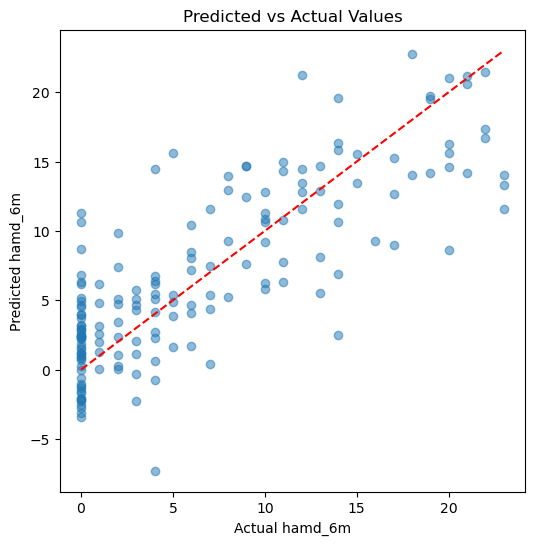

In [38]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual hamd_6m")
plt.ylabel("Predicted hamd_6m")
plt.title("Predicted vs Actual Values")
plt.show()

#### Residuals plot

- Checks errors (predicted – actual).
- Good models have residuals centered around 0.

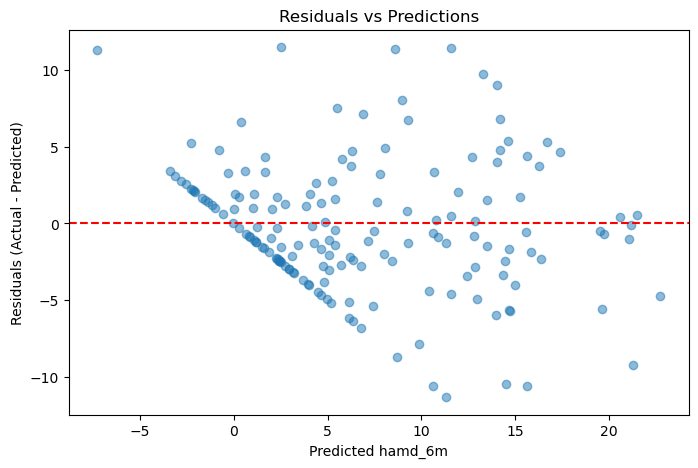

In [40]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted hamd_6m")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predictions")
plt.show()

#### Distribution of errors

- To see if errors are normally distributed (a linear regression assumption).

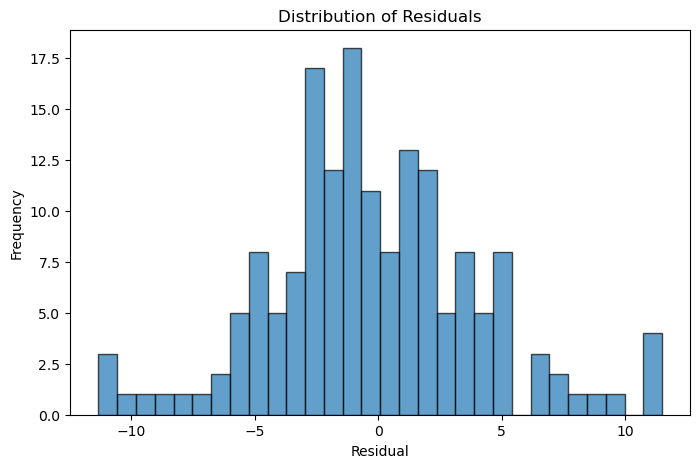

In [41]:
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()